In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bf41fc3d9425f0dfc6d6dc443c166a5


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | aksarka
Processing Record 3 of Set 1 | san luis
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | asyut
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | altoona
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | sechura
Processing Record 15 of Set 1 | berlevag
Processing Record 16 of Set 1 | kudahuvadhoo
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ipora
Processing Record 19 of Set 1 | nortelandia
Processing Record 20 of Set 1 | cardedeu
Processing Record 21 of Set 1 | kota bahru
Processing Record 22 of Set 1 | general pico
Pr

Processing Record 38 of Set 4 | bredasdorp
Processing Record 39 of Set 4 | jinka
Processing Record 40 of Set 4 | isiro
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | piney green
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | singarayakonda
Processing Record 45 of Set 4 | verkhnevilyuysk
Processing Record 46 of Set 4 | northam
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | plyussa
Processing Record 50 of Set 4 | fort dodge
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | andenes
Processing Record 3 of Set 5 | dicabisagan
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | nuuk
Processing Record 8 of Set 5 | altay
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | kiunga
Processing Record 11 o

Processing Record 27 of Set 8 | kysyl-syr
Processing Record 28 of Set 8 | onitsha
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | liwonde
Processing Record 31 of Set 8 | kampot
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | ahuimanu
Processing Record 34 of Set 8 | kaitangata
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | rungata
City not found. Skipping...
Processing Record 37 of Set 8 | sumbe
Processing Record 38 of Set 8 | akdepe
Processing Record 39 of Set 8 | pallasovka
Processing Record 40 of Set 8 | nanyamba
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | sorvag
City not found. Skipping...
Processing Record 43 of Set 8 | drumheller
Processing Record 44 of Set 8 | bethel
Processing Record 45 of Set 8 | eirunepe
Processing Record 46 of Set 8 | mount gambier
Processing Record 47 of Set 8 | pirojpur
Processing Record 48 of Set 8 | axim
Process

Processing Record 16 of Set 12 | santa rosa
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | severnyy
Processing Record 19 of Set 12 | general roca
Processing Record 20 of Set 12 | tarakan
Processing Record 21 of Set 12 | sabang
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | mezica
Processing Record 24 of Set 12 | sitka
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | bereda
Processing Record 27 of Set 12 | palmer
Processing Record 28 of Set 12 | presque isle
Processing Record 29 of Set 12 | teya
Processing Record 30 of Set 12 | pochutla
Processing Record 31 of Set 12 | santarem
Processing Record 32 of Set 12 | labuhan
Processing Record 33 of Set 12 | ondjiva
Processing Record 34 of Set 12 | odemis
City not found. Skipping...
Processing Record 35 of Set 12 | egvekinot
Processing Record 36 of Set 12 | kabare
Processing Record 37 of Set 12 | sola
Processing Record 38 of Set 12 | svetlogorsk
Processing Record 39 of Se

In [10]:
len(city_data)

580

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,63.0500,179.3167,8.69,97,99,18.84,RU,2021-10-31 00:20:16
1,Aksarka,66.5606,67.7975,-3.98,92,15,5.21,RU,2021-10-31 00:19:11
2,San Luis,-33.2950,-66.3356,78.49,41,40,21.85,AR,2021-10-31 00:20:16
3,Zhigansk,66.7697,123.3711,3.22,91,100,23.33,RU,2021-10-31 00:20:17
4,Tuktoyaktuk,69.4541,-133.0374,14.00,92,75,8.05,CA,2021-10-31 00:20:16
5,Kapaa,22.0752,-159.3190,82.38,79,90,5.75,US,2021-10-31 00:20:17
6,Asyut,27.1810,31.1837,81.10,33,100,13.40,EG,2021-10-31 00:20:18
7,Cape Town,-33.9258,18.4232,62.10,84,0,1.01,ZA,2021-10-31 00:20:18
8,Busselton,-33.6500,115.3333,60.04,75,96,3.06,AU,2021-10-31 00:17:20
9,Altoona,40.5187,-78.3947,54.32,95,100,0.36,US,2021-10-31 00:19:16


In [12]:
#Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Display DataFrame with columns in desired order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beringovskiy,RU,2021-10-31 00:20:16,63.0500,179.3167,8.69,97,99,18.84
1,Aksarka,RU,2021-10-31 00:19:11,66.5606,67.7975,-3.98,92,15,5.21
2,San Luis,AR,2021-10-31 00:20:16,-33.2950,-66.3356,78.49,41,40,21.85
3,Zhigansk,RU,2021-10-31 00:20:17,66.7697,123.3711,3.22,91,100,23.33
4,Tuktoyaktuk,CA,2021-10-31 00:20:16,69.4541,-133.0374,14.00,92,75,8.05
5,Kapaa,US,2021-10-31 00:20:17,22.0752,-159.3190,82.38,79,90,5.75
6,Asyut,EG,2021-10-31 00:20:18,27.1810,31.1837,81.10,33,100,13.40
7,Cape Town,ZA,2021-10-31 00:20:18,-33.9258,18.4232,62.10,84,0,1.01
8,Busselton,AU,2021-10-31 00:17:20,-33.6500,115.3333,60.04,75,96,3.06
9,Altoona,US,2021-10-31 00:19:16,40.5187,-78.3947,54.32,95,100,0.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

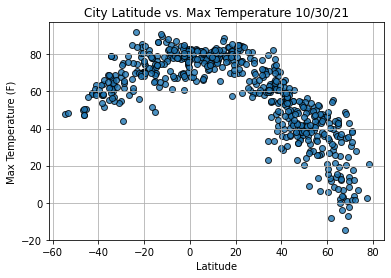

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

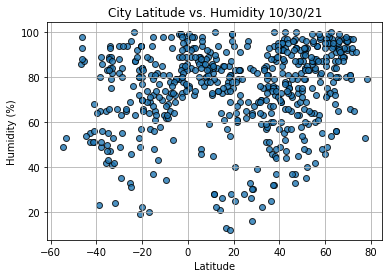

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

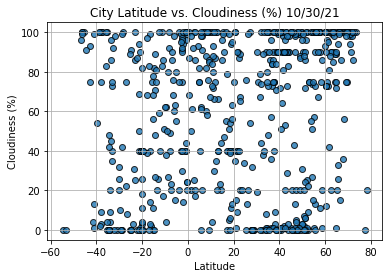

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

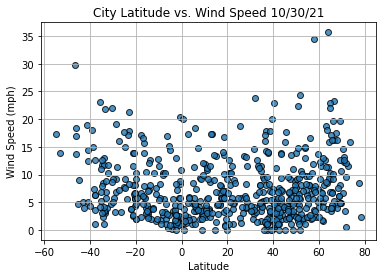

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Berlevag
Country                        NO
Date          2021-10-31 00:17:02
Lat                       70.8578
Lng                       29.0864
Max Temp                    38.91
Humidity                       81
Cloudiness                     98
Wind Speed                  13.11
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
575     True
576    False
577    False
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beringovskiy,RU,2021-10-31 00:20:16,63.0500,179.3167,8.69,97,99,18.84
1,Aksarka,RU,2021-10-31 00:19:11,66.5606,67.7975,-3.98,92,15,5.21
3,Zhigansk,RU,2021-10-31 00:20:17,66.7697,123.3711,3.22,91,100,23.33
4,Tuktoyaktuk,CA,2021-10-31 00:20:16,69.4541,-133.0374,14.00,92,75,8.05
5,Kapaa,US,2021-10-31 00:20:17,22.0752,-159.3190,82.38,79,90,5.75


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

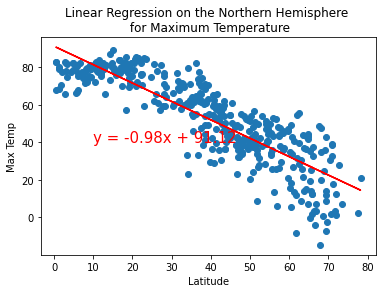

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

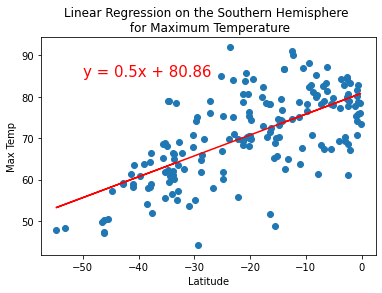

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

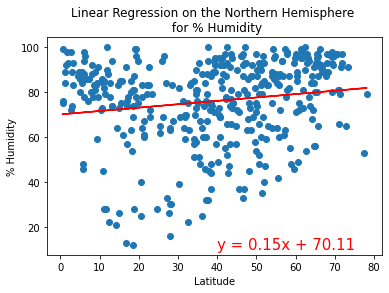

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

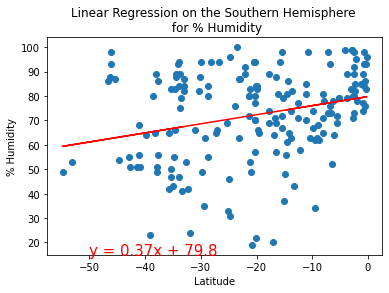

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

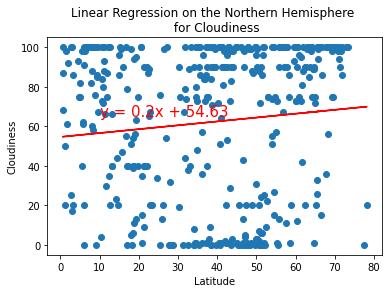

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(10,65))

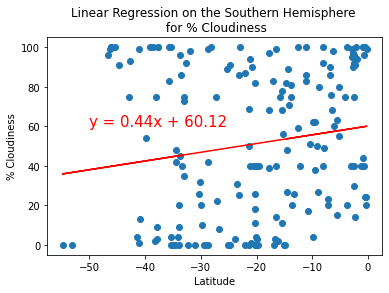

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

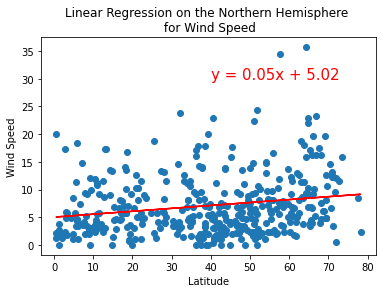

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

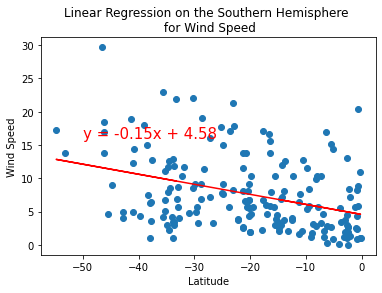

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,16))